In [2]:
# Cell 1
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

# --- CHOOSE WHICH MODEL TO TRAIN ---
# This is set to 'yawn' for this training run
MODEL_TYPE = 'yawn'
# -------------------------------------

print(f"--- Setting up for '{MODEL_TYPE}' Model ---")

# --- Configuration based on MODEL_TYPE ---
if MODEL_TYPE == 'eye':
    base_dir = os.path.join('datasets', 'eye_data')
elif MODEL_TYPE == 'yawn':
    base_dir = os.path.join('datasets', 'yawn_data')
else:
    raise ValueError("Invalid MODEL_TYPE. Choose 'eye' or 'yawn'.")

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# --- Image Parameters ---
IMG_WIDTH = 80
IMG_HEIGHT = 80
BATCH_SIZE = 32

# --- Create Image Data Generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='grayscale'
)

# IMPORTANT: Note the class indices that are printed!
print("\nClass indices found by the generator:")
print(train_generator.class_indices)

--- Setting up for 'yawn' Model ---
Found 1017 images belonging to 2 classes.
Found 216 images belonging to 2 classes.

Class indices found by the generator:
{'no_yawn': 0, 'yawn': 1}


In [3]:
# Cell 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

C:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 78, 78, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,001 (16.36 MB)

 Trainable params: 4,288,001 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Cell 3
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


In [5]:
# Cell 4
EPOCHS = 20

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

C:\Users\acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 451ms/step - accuracy: 0.5900 - loss: 0.6669 - val_accuracy: 0.7037 - val_loss: 0.5377
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 413ms/step - accuracy: 0.6834 - loss: 0.6051 - val_accuracy: 0.8750 - val_loss: 0.4553
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 409ms/step - accuracy: 0.7581 - loss: 0.5407 - val_accuracy: 0.9213 - val_loss: 0.2956
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 410ms/step - accuracy: 0.7424 - loss: 0.5459 - val_accuracy: 0.9213 - val_loss: 0.3991
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 416ms/step - accuracy: 0.7758 - loss: 0.5150 - val_accuracy: 0.8889 - val_loss: 0.2945
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 408ms/step - accuracy: 0.7945 - loss: 0.4806 - val_accuracy: 0.9398 - val_loss: 0.2904
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 418ms/step - accuracy: 0.8181 - loss: 0.4230 - val_accuracy: 0.9259 - val_loss: 0.2170
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 378ms/step - accuracy: 0.8299 - loss: 0.4020 - val_accu

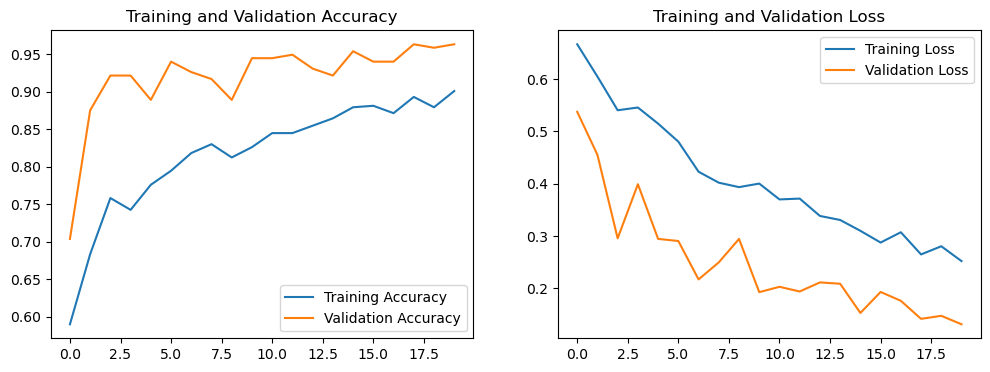

In [6]:
# Cell 5
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [7]:
# Cell 6
if MODEL_TYPE == 'eye':
    model_save_name = 'eye_state_model.tflite'
elif MODEL_TYPE == 'yawn':
    model_save_name = 'yawn_model.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open(model_save_name, 'wb') as f:
    f.write(tflite_model)

print(f"\n--- Successfully trained and saved '{model_save_name}' ---")

INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmp3ru716jd\assets


INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmp3ru716jd\assets


Saved artifact at 'C:\Users\acer\AppData\Local\Temp\tmp3ru716jd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 80, 80, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2530213861264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2530213862032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2530213863376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2530213861072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2530213862800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2530213864144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2530213861456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2530213862416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2530213863952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2530213865104: TensorSpec(shape=(), dtype=tf.resource, name=None)

--- Succe